In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12

In [2]:
# 문피아 유료소설 200개 장르별 점유율 시각화
df=pd.read_csv('./data/Munpia_pay200.txt', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   제목       200 non-null    object
 1   장르       200 non-null    object
 2   작가       200 non-null    object
 3   지수       200 non-null    int64 
 4   현대판타지    200 non-null    bool  
 5   판타지      200 non-null    bool  
 6   무협       200 non-null    bool  
 7   대체역사     200 non-null    bool  
 8   퓨전       200 non-null    bool  
 9   스포츠      200 non-null    bool  
 10  드라마      200 non-null    bool  
 11  로맨스      200 non-null    bool  
 12  게임       200 non-null    bool  
 13  전쟁·밀리터리  200 non-null    bool  
 14  일반소설     200 non-null    bool  
dtypes: bool(11), int64(1), object(3)
memory usage: 10.0+ KB


In [3]:
M_hfan=df.현대판타지.sum()
M_fan=df.판타지.sum()
M_mu=df.무협.sum()
M_his=df.대체역사.sum()
M_fu=df.퓨전.sum()
M_spo=df.스포츠.sum()
M_dra=df.드라마.sum()
M_roman=df.로맨스.sum()
M_game=df.게임.sum()
M_war=df.전쟁·밀리터리.sum()
M_normal=df.일반소설.sum()

# 장르 전체 숫자 구함 total
total = M_hfan + M_fan + M_mu + M_fu + M_his + M_spo + M_dra + M_roman + M_game + M_war + M_normal
total

# 장르별 점유율 구함
M_hfan /= total
M_fan /= total
M_mu /= total
M_fu /= total
M_his /= total
M_spo /= total
M_dra /= total
M_roman /= total
M_game /= total
M_war /= total
M_normal /= total
print(M_hfan, M_fan, M_mu, M_fu, M_his, M_spo, M_dra, M_roman, M_game, M_war, M_normal)

0.3460490463215259 0.22343324250681199 0.0326975476839237 0.17438692098092642 0.09809264305177112 0.043596730245231606 0.043596730245231606 0.005449591280653951 0.010899182561307902 0.01634877384196185 0.005449591280653951


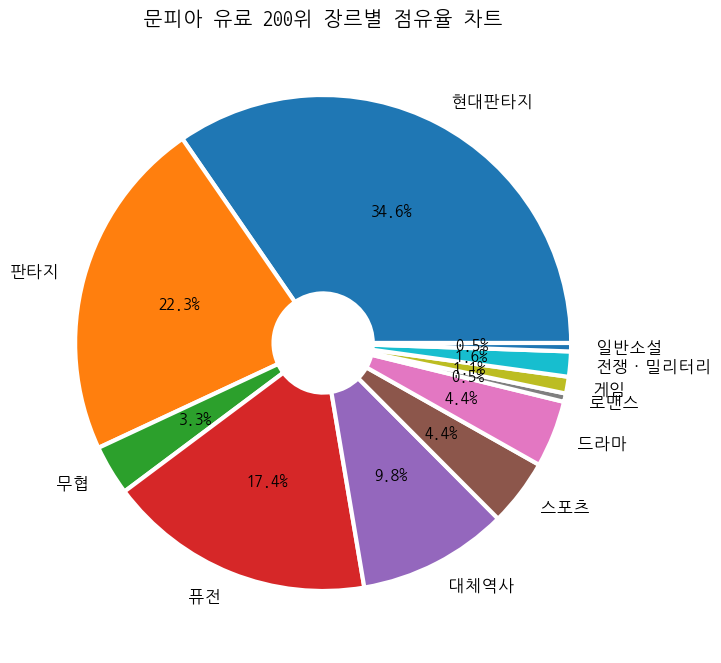

In [4]:
plt.figure(figsize=(8, 12))

ratio = [M_hfan, M_fan, M_mu, M_fu, M_his, M_spo, M_dra, M_roman, M_game, M_war, M_normal]
labels = ['현대판타지', '판타지', '무협', '퓨전', '대체역사',  '스포츠', '드라마', '로맨스', '게임', '전쟁·밀리터리', '일반소설']

wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.title('문피아 유료 200위 장르별 점유율 차트')

plt.pie(ratio, labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops)

plt.show()

In [14]:
# 데이터 프레임의 지수는 높을 수록 구매율, 결제율이 높다는 뜻임 
# 각 장르별 지수의 합을 구한 후 위에 처럼 파이차트와 막대 차트로 시각화
sum_hfan = df[df.현대판타지 == True]['지수'].sum()
sum_fan = df[df.판타지 == True]['지수'].sum()
sum_mu = df[df.무협 == True]['지수'].sum()
sum_his = df[df.대체역사 == True]['지수'].sum()
sum_fu = df[df.퓨전 == True]['지수'].sum()
sum_sport = df[df.스포츠 == True]['지수'].sum()
sum_drama = df[df.드라마 == True]['지수'].sum()
sum_roman = df[df.로맨스 == True]['지수'].sum()
sum_game = df[df.게임 == True]['지수'].sum()
sum_war = df[df.전쟁·밀리터리 == True]['지수'].sum()
sum_normal = df[df.일반소설 == True]['지수'].sum()
# 지수의 합계
total_gisu = sum_hfan + sum_fan + sum_mu + sum_his + sum_fu + sum_sport + sum_drama + sum_roman + sum_game + sum_war + sum_normal

# 장르별 지수의 점유율
sum_hfan /= total_gisu
sum_fan /= total_gisu
sum_mu /= total_gisu
sum_his /= total_gisu
sum_fu /= total_gisu
sum_sport /= total_gisu
sum_drama /= total_gisu
sum_roman /= total_gisu
sum_game /= total_gisu
sum_war /= total_gisu
sum_normal /= total_gisu


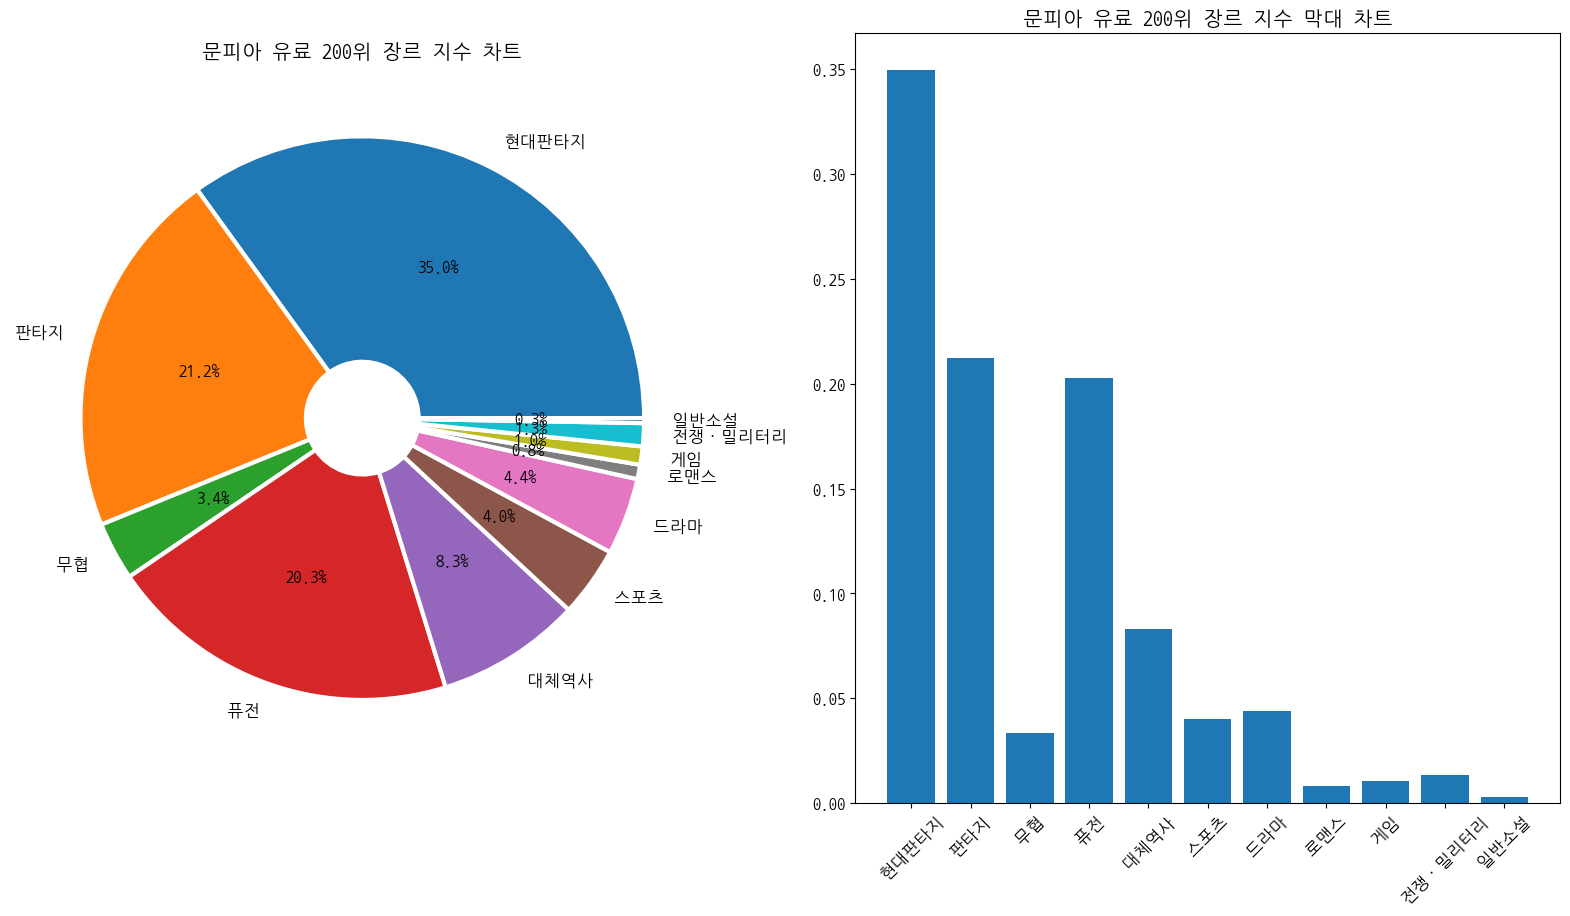

In [15]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
ratio = [sum_hfan, sum_fan, sum_mu, sum_fu, sum_his, sum_sport, sum_drama, sum_roman, sum_game, sum_war, sum_normal]
labels = ['현대판타지', '판타지', '무협', '퓨전', '대체역사',  '스포츠', '드라마', '로맨스', '게임', '전쟁·밀리터리', '일반소설']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
plt.title('문피아 유료 200위 장르 지수 차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops)

plt.subplot(1,2,2)
plt.title('문피아 유료 200위 장르 지수 막대 차트')
plt.xticks(rotation=45)
plt.bar(labels, ratio)

plt.show()